<a href="https://colab.research.google.com/github/janel-dsbc/stamp-prices/blob/main/Final_Copy_of_Ahle_JanelProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Dive Coding Data Science Bootcamp Project 1**

---
Janel Ahle - 6 June 2024

#**Problem Definition**

1. We want to predict whether a future customer will make a *transaction* based on their transaction data. Based on binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

#**Data Overview**

The data provided has the same structure as real data typically available to solve this problem. The columns of the input variables have been anonymized, so there is no intuition available to help judge which variables might be more important, so all variables need to be considered equally.

##**Data Collection**

We load Pandas, Numpy, and Matplotlib..

And we also load data Train.csv from the Google Drive folder.

Here is the direct link to the [data](https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv)



##Imports

In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


##File Paths
File paths for train test data

In [2]:
base_path = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/'
train_path = base_path + 'Transaction.train.csv'
test_path = base_path + 'Transaction.test.csv'

##Load Data
We will then load the data into a DataFrame and take a look at the first few rows to get a feel for how the data looks.

In [3]:
train_orig = pd.read_csv(train_path)
train_orig.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


#Data Cleaning

Next, we will look at the shape and tail end of the data.

In [4]:
train_orig.describe()

,Unnamed: 0,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.00000,180000.000000,...,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,89999.500000,0.100222,10.678650,-1.630045,10.712922,5.408688,7.566953,14.024017,8.52808,15.243424,...,5.635897,-0.000418,-0.668334,20.208845,2.595090,12.756574,3.236201,7.440715,1.927078,15.870166
std,51961.668564,0.300297,3.041036,4.050519,2.639146,0.866265,1.235043,0.190038,4.64170,7.851050,...,0.369629,4.422915,5.968300,7.132446,2.801692,9.320939,4.561317,3.021636,1.476777,3.010492
min,0.000000,0.000000,0.408400,-15.043400,2.117100,2.347300,3.970500,13.434600,-6.01110,-10.664200,...,4.258800,-14.506000,-22.748700,-2.995300,-7.856100,-18.489700,-14.093300,-2.691700,-3.814500,6.299300
25%,44999.750000,0.000000,8.451675,-4.745600,8.720000,4.768500,6.618800,13.893900,5.06575,9.170200,...,5.374200,-3.253575,-4.997500,15.062900,0.628600,5.661300,-0.062000,5.160325,0.890000,13.830400
50%,89999.500000,0.000000,10.526750,-1.611250,10.579600,5.385600,7.628500,14.025500,8.59920,15.198900,...,5.634500,0.008500,-0.560300,20.203300,2.513800,12.520300,3.204650,7.350950,1.899700,15.934600
75%,134999.250000,0.000000,12.756200,1.360225,12.514100,6.003200,8.583800,14.164400,12.27330,21.010500,...,5.905600,3.098325,3.632525,25.639125,4.396725,19.461725,6.409900,9.511125,2.947225,18.061425
max,179999.000000,1.000000,20.315000,10.376800,19.353000,8.447700,11.150600,14.654500,22.33150,41.748000,...,7.089000,16.731900,18.855400,43.546800,13.448700,44.363400,18.440900,16.716500,8.402400,26.079100


In [5]:
train_orig.shape

(180000, 53)

In [6]:
type(train_orig.describe())

pandas.core.frame.DataFrame

In [7]:
train_orig.tail()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760
179999,179999,train_179999,0,11.6252,3.3959,11.5558,4.2003,7.4666,13.7381,12.9590,...,5.0415,-2.4210,-3.6829,14.2422,1.0741,26.3943,4.1482,11.9539,2.9846,15.6002


I am curious to see if there are any nulls in the variable data.

In [8]:
train_orig.isnull().sum()*100

Unnamed: 0    0
ID_code       0
target        0
var_0         0
var_1         0
var_2         0
var_3         0
var_4         0
var_5         0
var_6         0
var_7         0
var_8         0
var_9         0
var_10        0
var_11        0
var_12        0
var_13        0
var_14        0
var_15        0
var_16        0
var_17        0
var_18        0
var_19        0
var_20        0
var_21        0
var_22        0
var_23        0
var_24        0
var_25        0
var_26        0
var_27        0
var_28        0
var_29        0
var_30        0
var_31        0
var_32        0
var_33        0
var_34        0
var_35        0
var_36        0
var_37        0
var_38        0
var_39        0
var_40        0
var_41        0
var_42        0
var_43        0
var_44        0
var_45        0
var_46        0
var_47        0
var_48        0
var_49        0
dtype: int64

It appears that are no nulls in the variable data.

In [9]:
train_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  180000 non-null  int64  
 1   ID_code     180000 non-null  object 
 2   target      180000 non-null  int64  
 3   var_0       180000 non-null  float64
 4   var_1       180000 non-null  float64
 5   var_2       180000 non-null  float64
 6   var_3       180000 non-null  float64
 7   var_4       180000 non-null  float64
 8   var_5       180000 non-null  float64
 9   var_6       180000 non-null  float64
 10  var_7       180000 non-null  float64
 11  var_8       180000 non-null  float64
 12  var_9       180000 non-null  float64
 13  var_10      180000 non-null  float64
 14  var_11      180000 non-null  float64
 15  var_12      180000 non-null  float64
 16  var_13      180000 non-null  float64
 17  var_14      180000 non-null  float64
 18  var_15      180000 non-null  float64
 19  va

I will make a copy of the original data before cleaning the data.  

In [10]:
train = train_orig.copy()
train.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


The "Unnamed: 0' doesn't seem to be giving anything useful and looks to be a placeholder for the row number and so I will remove the column

In [11]:
train.drop('Unnamed: 0', axis = 1, inplace = True)
train

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,22.3368,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,16.0279,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,15.2717,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,20.4504,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760


The ID_code also doesn't seem to be useful and so I will also remove the column.

In [12]:
train.drop('ID_code', axis = 1, inplace = True)
train

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,22.3368,11.4176,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,16.0279,15.7685,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,15.2717,7.7995,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,20.4504,29.9869,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760


Everything else is the target and all the variables.  We won't know if the variable have any correlation until we analyze the data, so everything else will be left alone for now.

In [13]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.00000,180000.000000,180000.000000,...,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,0.100222,10.678650,-1.630045,10.712922,5.408688,7.566953,14.024017,8.52808,15.243424,17.264876,...,5.635897,-0.000418,-0.668334,20.208845,2.595090,12.756574,3.236201,7.440715,1.927078,15.870166
std,0.300297,3.041036,4.050519,2.639146,0.866265,1.235043,0.190038,4.64170,7.851050,8.203204,...,0.369629,4.422915,5.968300,7.132446,2.801692,9.320939,4.561317,3.021636,1.476777,3.010492
min,0.000000,0.408400,-15.043400,2.117100,2.347300,3.970500,13.434600,-6.01110,-10.664200,-10.089000,...,4.258800,-14.506000,-22.748700,-2.995300,-7.856100,-18.489700,-14.093300,-2.691700,-3.814500,6.299300
25%,0.000000,8.451675,-4.745600,8.720000,4.768500,6.618800,13.893900,5.06575,9.170200,11.552000,...,5.374200,-3.253575,-4.997500,15.062900,0.628600,5.661300,-0.062000,5.160325,0.890000,13.830400
50%,0.000000,10.526750,-1.611250,10.579600,5.385600,7.628500,14.025500,8.59920,15.198900,17.246850,...,5.634500,0.008500,-0.560300,20.203300,2.513800,12.520300,3.204650,7.350950,1.899700,15.934600
75%,0.000000,12.756200,1.360225,12.514100,6.003200,8.583800,14.164400,12.27330,21.010500,23.100050,...,5.905600,3.098325,3.632525,25.639125,4.396725,19.461725,6.409900,9.511125,2.947225,18.061425
max,1.000000,20.315000,10.376800,19.353000,8.447700,11.150600,14.654500,22.33150,41.748000,49.044300,...,7.089000,16.731900,18.855400,43.546800,13.448700,44.363400,18.440900,16.716500,8.402400,26.079100


In [14]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
target,180000.0,0.100222,0.300297,0.0000,0.000000,0.00000,0.000000,1.0000
var_0,180000.0,10.678650,3.041036,0.4084,8.451675,10.52675,12.756200,20.3150
var_1,180000.0,-1.630045,4.050519,-15.0434,-4.745600,-1.61125,1.360225,10.3768
var_2,180000.0,10.712922,2.639146,2.1171,8.720000,10.57960,12.514100,19.3530
var_3,180000.0,5.408688,0.866265,2.3473,4.768500,5.38560,6.003200,8.4477
var_4,180000.0,7.566953,1.235043,3.9705,6.618800,7.62850,8.583800,11.1506
var_5,180000.0,14.024017,0.190038,13.4346,13.893900,14.02550,14.164400,14.6545
var_6,180000.0,8.528080,4.641700,-6.0111,5.065750,8.59920,12.273300,22.3315
var_7,180000.0,15.243424,7.851050,-10.6642,9.170200,15.19890,21.010500,41.7480
var_8,180000.0,17.264876,8.203204,-10.0890,11.552000,17.24685,23.100050,49.0443


#Exploratory Data Analysis

We create some visuals of our data with a heatmap and histograms to explore whether our features have any correlation to each other and if the data is normally distributed.





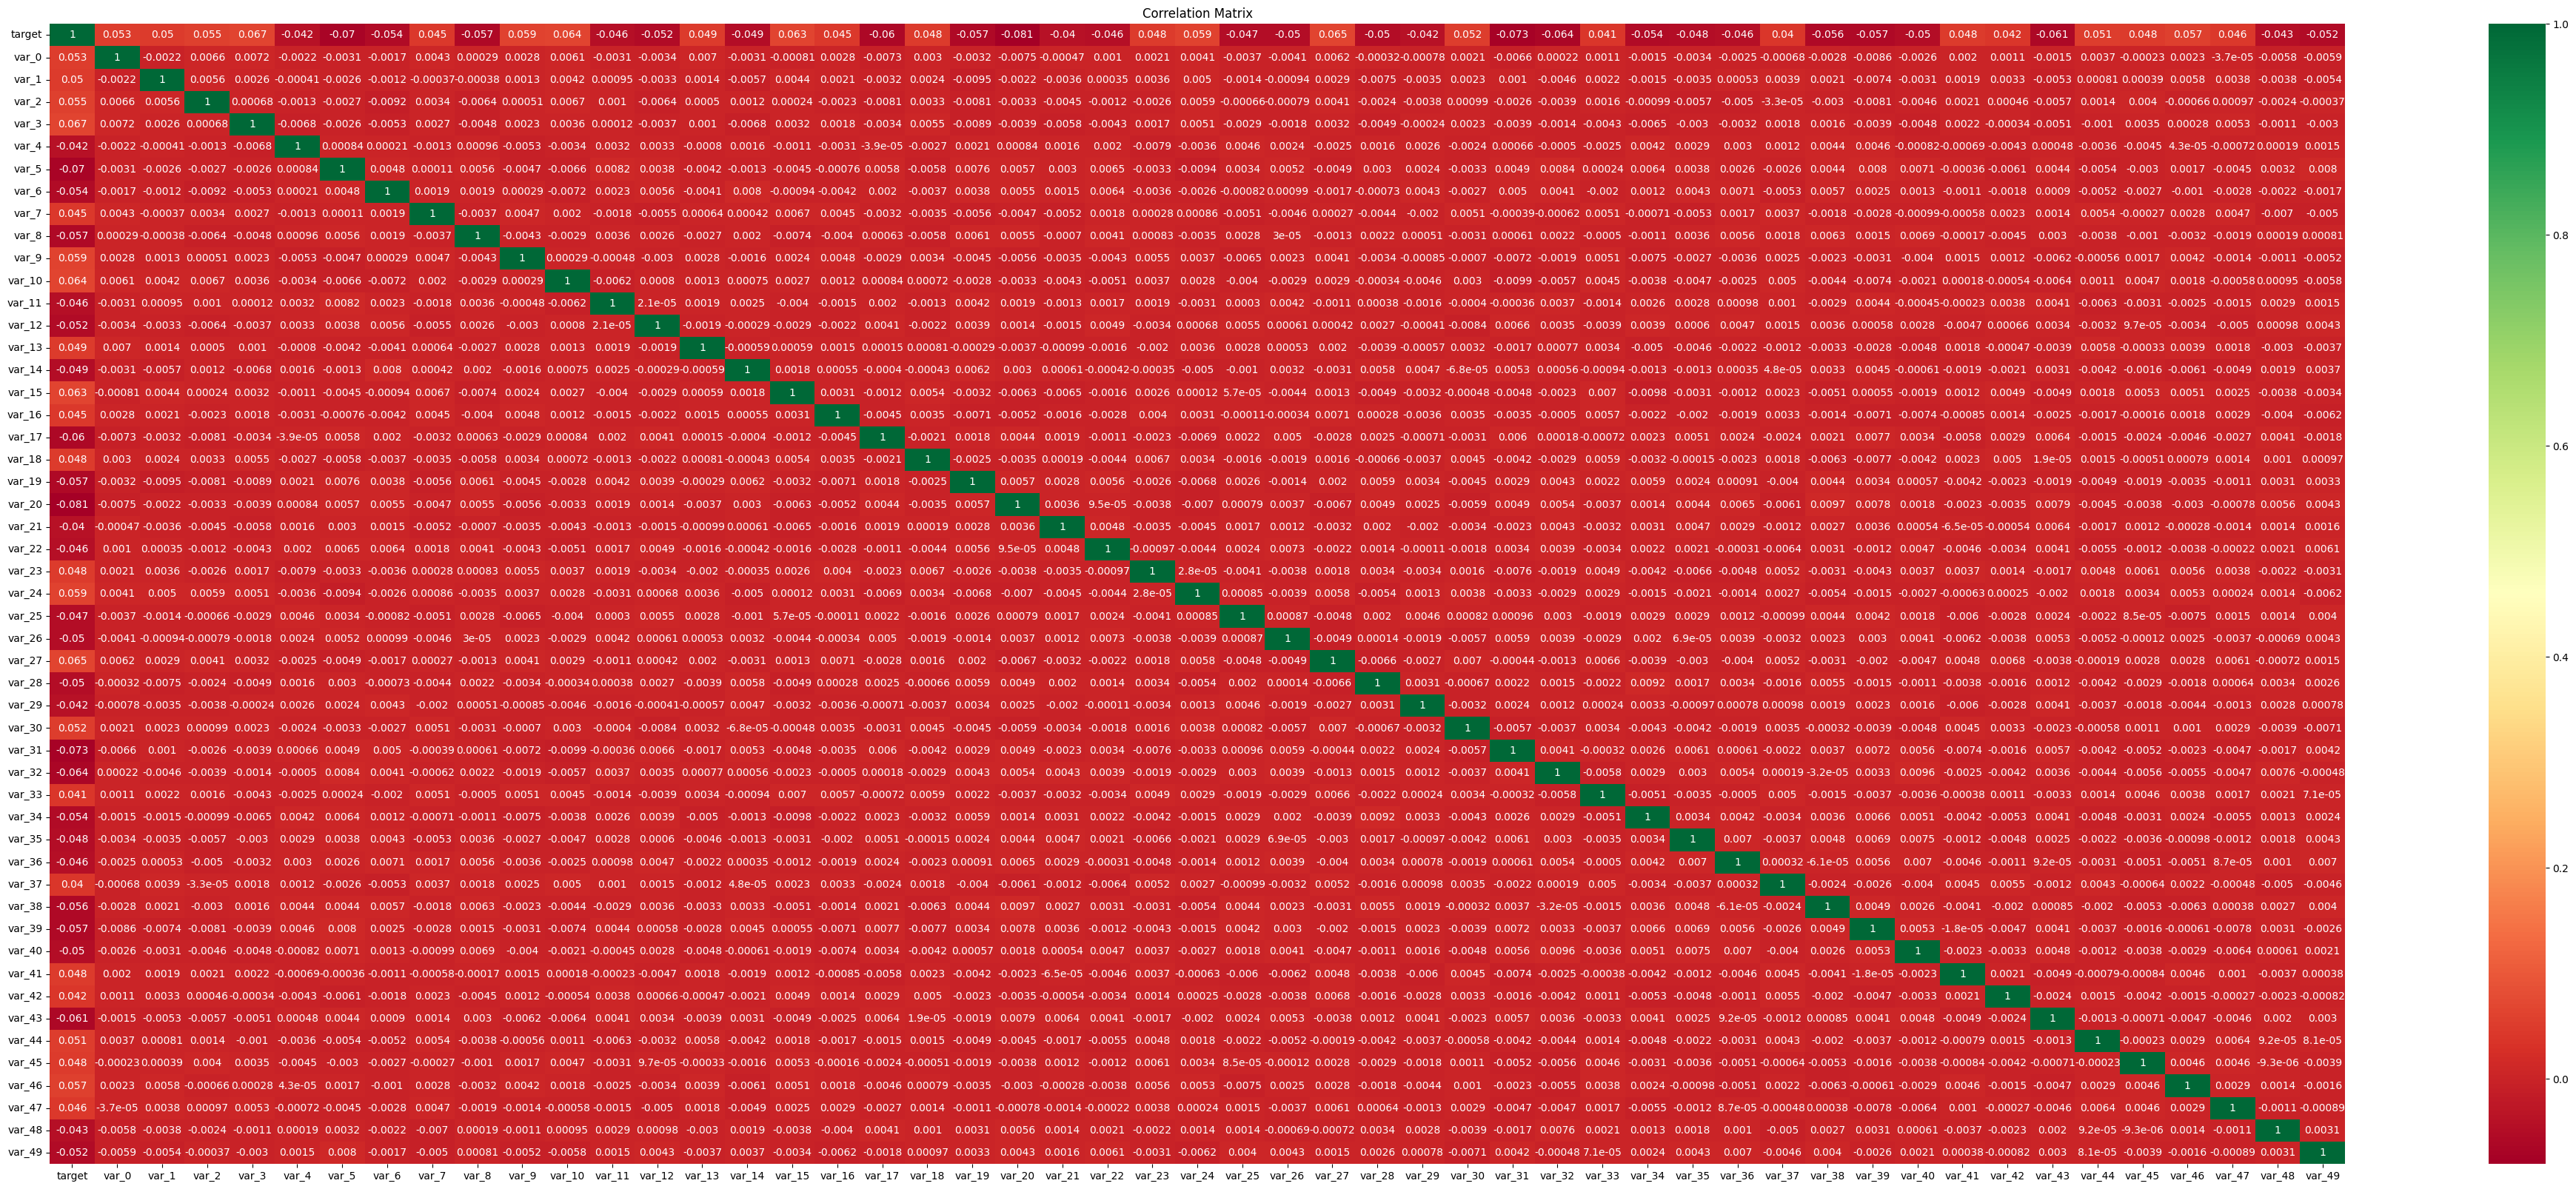

In [15]:
# Correlation Plot
column_correlations = train.corr()
#column_correlations
plt.figure(figsize=(50,20))
plt.title('Correlation Matrix')
sns.heatmap(column_correlations, annot=True, cmap='RdYlGn') ;

This correlation matrix is indicative that our Gaussian Bayes model should work because it shows little correlation between the features/variables.

The Gaussian Bayes model has two assumptions:
1)  each of the feature's distribution is normal
2)  there is no correlation between the individual features

In [16]:
#Get most highly correlated varliables with target
target_correlations = train.corr()['target']
correlated_vars = abs(target_correlations).sort_values(ascending=False)
correlated_vars

target    1.000000
var_20    0.080689
var_31    0.073296
var_5     0.070015
var_3     0.066924
var_27    0.064868
var_32    0.063871
var_10    0.063565
var_15    0.062887
var_43    0.061291
var_17    0.059906
var_24    0.059306
var_9     0.059227
var_8     0.057378
var_39    0.057373
var_19    0.057320
var_46    0.056902
var_38    0.055704
var_2     0.055450
var_6     0.054375
var_34    0.053733
var_0     0.052904
var_30    0.052457
var_12    0.052324
var_49    0.051718
var_44    0.051110
var_26    0.050278
var_40    0.050049
var_1     0.049916
var_28    0.049551
var_13    0.049072
var_14    0.048623
var_18    0.048392
var_35    0.048198
var_41    0.047948
var_23    0.047569
var_45    0.047543
var_25    0.047005
var_22    0.046433
var_11    0.045516
var_36    0.045513
var_47    0.045506
var_16    0.045281
var_7     0.044769
var_48    0.042765
var_4     0.042073
var_29    0.041987
var_42    0.041593
var_33    0.040520
var_21    0.040311
var_37    0.040147
Name: target, dtype: float64

Looks like var_20 has the highest correlation with target.

Below are the top five higher correlators with target:

1. var_20    0.080689
1. var_31    0.073296
1. var_5     0.070015
1. var_3     0.066924
1. var_27    0.064868

The ‘target’ column indicates a successful transaction (‘1’) or a no-transaction (‘0’). We verify these are the only values in that column by using the unique function.  It returns that the column 'target' is an array with values of 0 and 1.

In [17]:
train['target'].unique()

array([0, 1])

In [18]:
#Provides the number of times that '0' and '1' occurs in the target column
train['target'].value_counts()

target
0    161960
1     18040
Name: count, dtype: int64

In [19]:
df_success = [train['target']==1].copy()
df_success

[0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 179995    False
 179996    False
 179997    False
 179998    False
 179999    False
 Name: target, Length: 180000, dtype: bool]

In [20]:
df_failure = [train['target']==0].copy()
df_failure

[0         True
 1         True
 2         True
 3         True
 4         True
           ... 
 179995    True
 179996    True
 179997    True
 179998    True
 179999    True
 Name: target, Length: 180000, dtype: bool]

The histograms below for our target shows us that we have an skewed data set with many more unsuccessful transactions.  Variables 1-50 have a seemingly relatively normal distribution.  

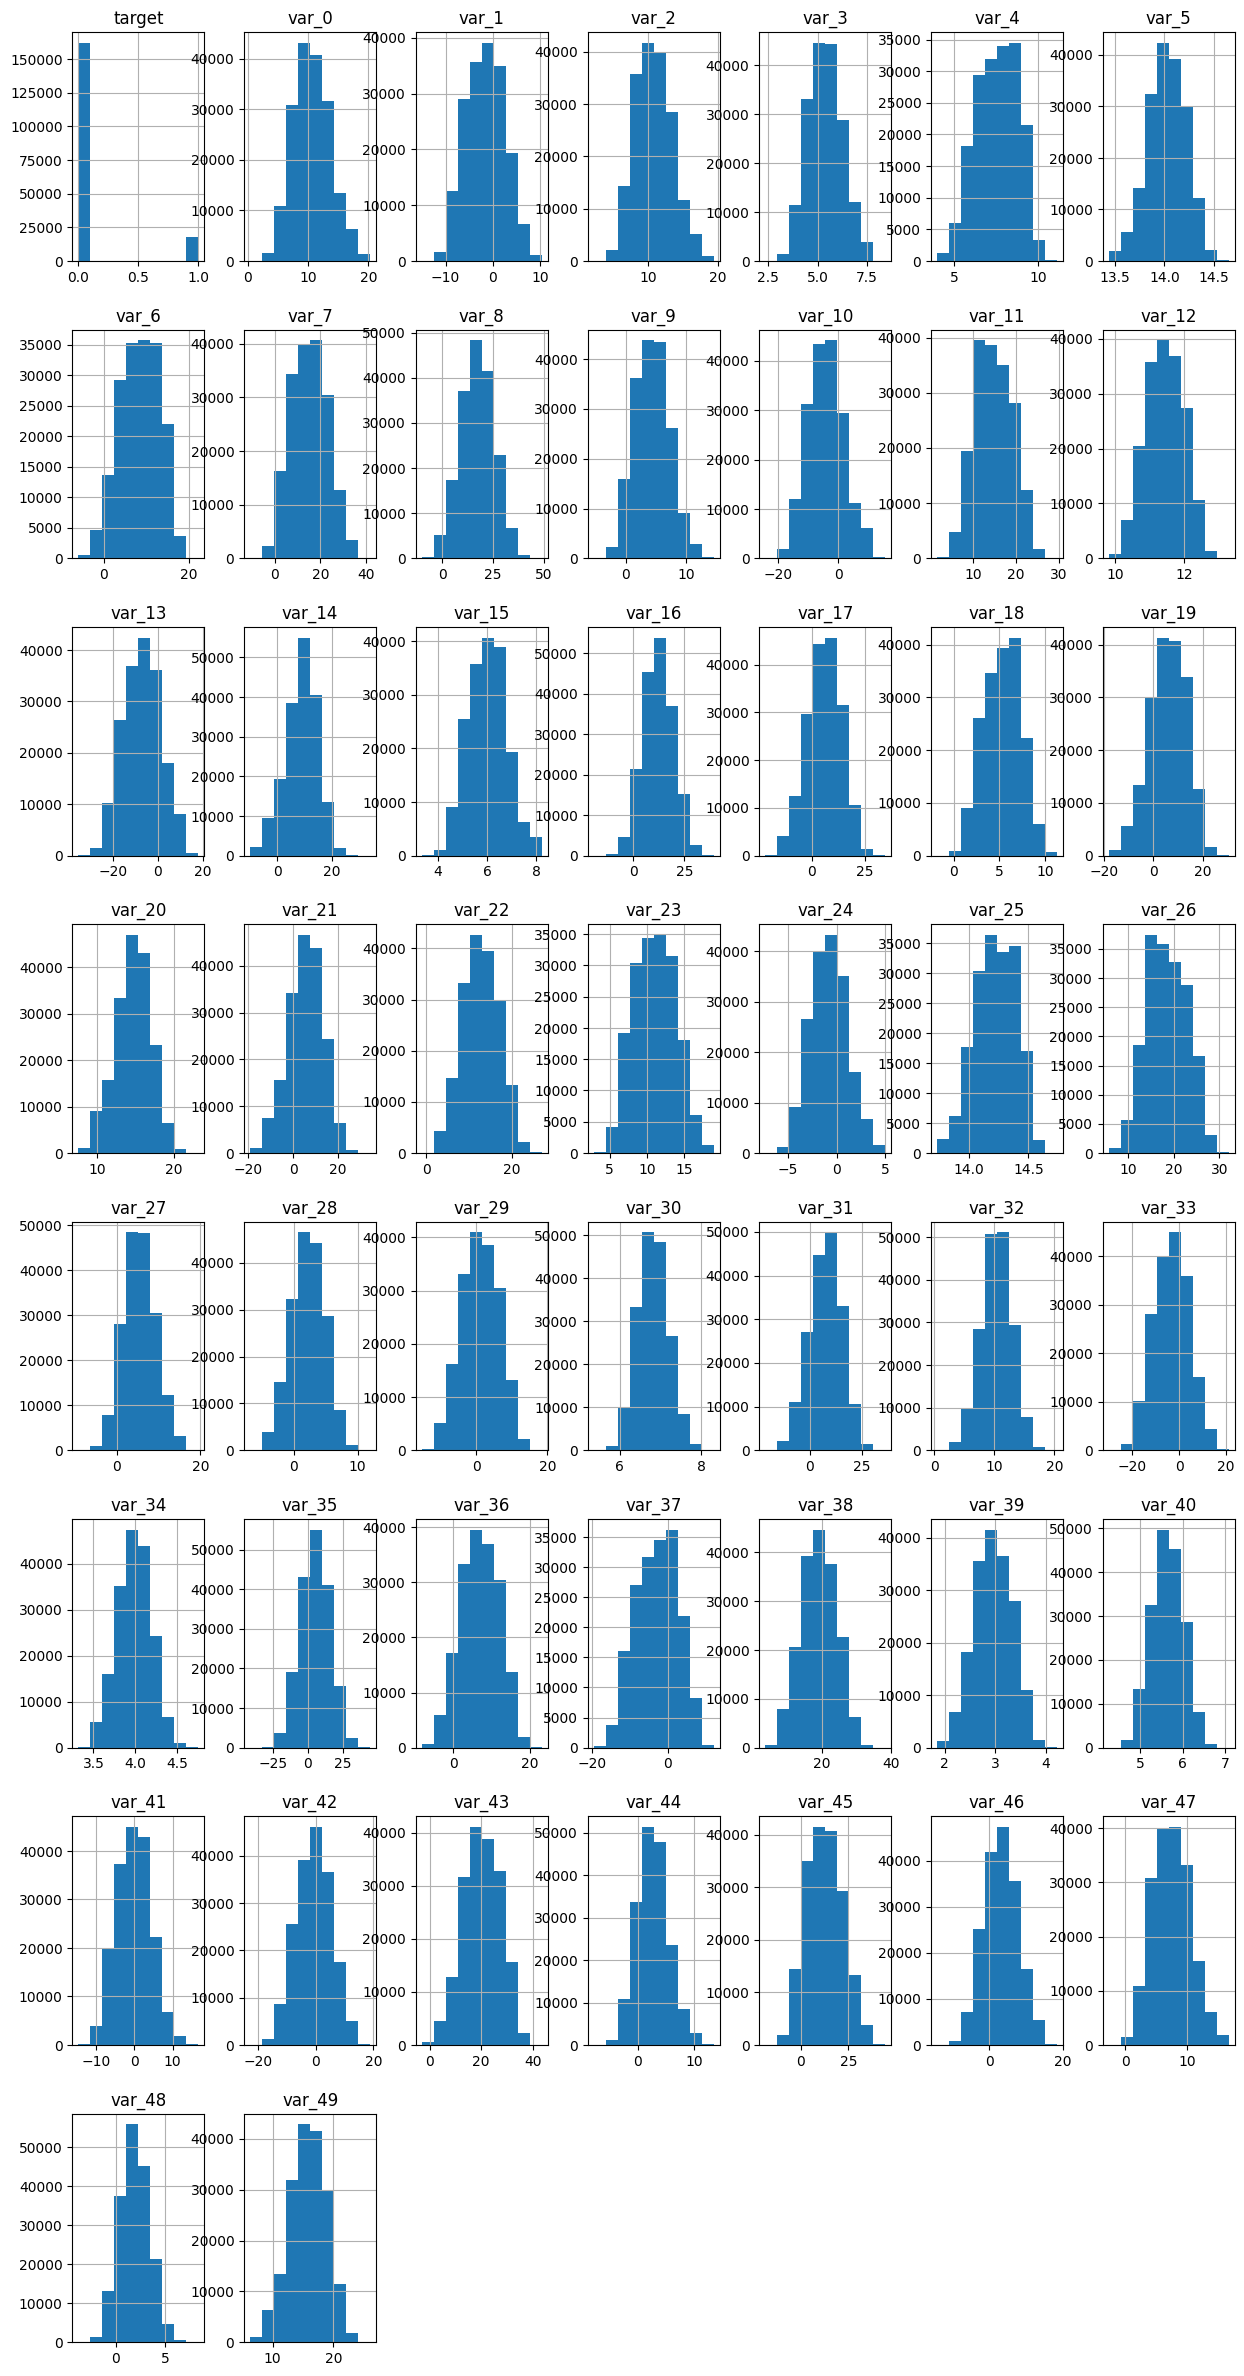

In [21]:
train.hist(figsize = (15,30));

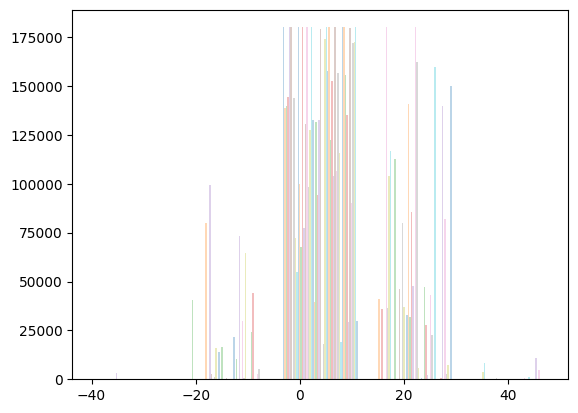

In [22]:
plt.hist(train, alpha=0.3, bins=5);

This appears to have that bell shaped curve for normal distribution

In [23]:
corr = train.corr()
correlated_vars = abs(target_correlations).sort_values(ascending=False)
correlated_vars

target    1.000000
var_20    0.080689
var_31    0.073296
var_5     0.070015
var_3     0.066924
var_27    0.064868
var_32    0.063871
var_10    0.063565
var_15    0.062887
var_43    0.061291
var_17    0.059906
var_24    0.059306
var_9     0.059227
var_8     0.057378
var_39    0.057373
var_19    0.057320
var_46    0.056902
var_38    0.055704
var_2     0.055450
var_6     0.054375
var_34    0.053733
var_0     0.052904
var_30    0.052457
var_12    0.052324
var_49    0.051718
var_44    0.051110
var_26    0.050278
var_40    0.050049
var_1     0.049916
var_28    0.049551
var_13    0.049072
var_14    0.048623
var_18    0.048392
var_35    0.048198
var_41    0.047948
var_23    0.047569
var_45    0.047543
var_25    0.047005
var_22    0.046433
var_11    0.045516
var_36    0.045513
var_47    0.045506
var_16    0.045281
var_7     0.044769
var_48    0.042765
var_4     0.042073
var_29    0.041987
var_42    0.041593
var_33    0.040520
var_21    0.040311
var_37    0.040147
Name: target, dtype: float64

In [24]:
corr_unstacked = corr.unstack()
corr_unstacked

target  target    1.000000
        var_0     0.052904
        var_1     0.049916
        var_2     0.055450
        var_3     0.066924
                    ...   
var_49  var_45   -0.003859
        var_46   -0.001607
        var_47   -0.000892
        var_48    0.003141
        var_49    1.000000
Length: 2601, dtype: float64

In [25]:
corr_unstacked_not_self = corr_unstacked[ corr_unstacked !=1 ]
corr_unstacked_not_self

target  var_0     0.052904
        var_1     0.049916
        var_2     0.055450
        var_3     0.066924
        var_4    -0.042073
                    ...   
var_49  var_44    0.000081
        var_45   -0.003859
        var_46   -0.001607
        var_47   -0.000892
        var_48    0.003141
Length: 2550, dtype: float64

#Data Processing


We will create two data frames: one with all the predictor columns (everything except for Unnamed: 0, ID_code, and target) and one with just the target. We make copies and not slices.

In [26]:
dataframe_target = train['target'].copy()
dataframe_target

0         0
1         0
2         0
3         0
4         0
         ..
179995    0
179996    0
179997    0
179998    0
179999    0
Name: target, Length: 180000, dtype: int64

In [27]:
dataframe_predictors = train.drop(columns = ['target']).copy()

We then define a Gaussian Naïve Bayes model using Sklearn.  

Create the GNB model:

In [28]:
gnb = GaussianNB()

In [29]:
y = train['target'].copy()
X = train.drop(columns = ['target']).copy()

Let's train the model and divide the two data frames we created earlier into training and testing subsets.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 36000 points : 3283


We create a confusion matrix:

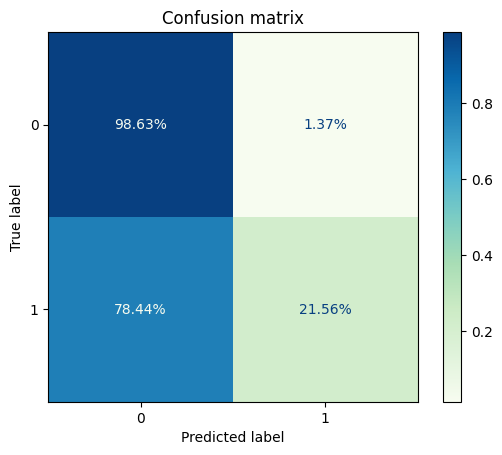

In [31]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix1.png')

#Cross Validation

Next, we'll perform cross validation to see what
the average accuracy is. I have taken the created function for cross-validation from our Titanic example.

In [32]:
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [33]:
accuracy_scores = cross_validate(X, y, 100)
print(round(accuracy_scores.mean(), 5))

0.91114


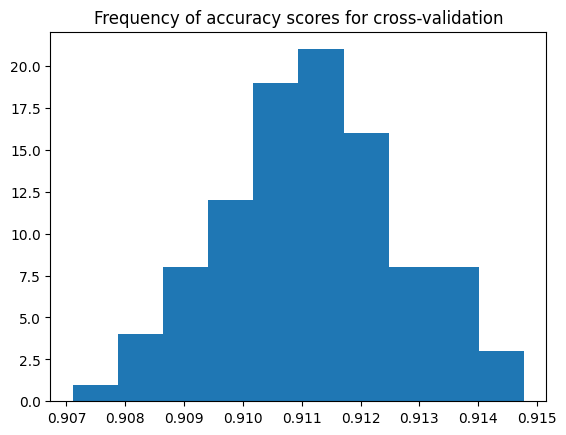

<Figure size 640x480 with 0 Axes>

In [34]:
plt.hist(accuracy_scores)
plt.title('Frequency of accuracy scores for cross-validation')
plt.show()
plt.savefig('Frequency of accuracy scores for cross-validation1.png')

After we run the function, we see a 91.12% accuracy.

After we have run through with our original data, we create a more balanced data set with a reduced 50/50 training data set.  
We do this by utilizing random sampling with Pandas using the groupby method.  We use a sample of n = 18_040 because we have 18_040 successful transactions in our original data set.

In [35]:
balanced_dataframe = train.groupby('target').sample(n = 18040)
balanced_dataframe.shape

(36080, 51)

In [36]:
y = balanced_dataframe['target'].copy()
X = balanced_dataframe.drop(columns = ['target']).copy()

We train this new data set.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 7216 points : 1720


We then further analyze the data and create a confusion matrix.



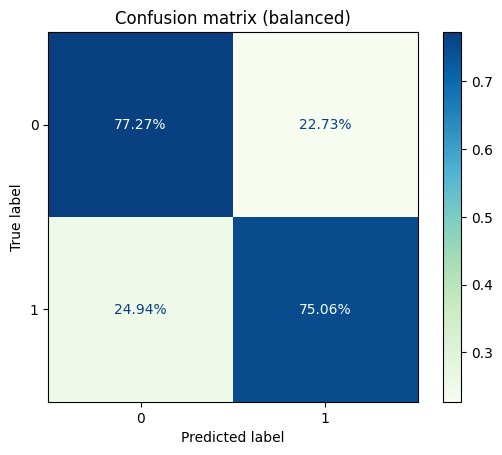

In [38]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix (balanced)') ;
plt.savefig('confusion_matrix2.png')

The accuracy score for this new set of balanced data frame has gone down to 75.8%

In [39]:
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [40]:
accuracy_scores = cross_validate(X, y, 100)
print(round(accuracy_scores.mean(), 5)) #5 rounds it to 5 places

0.75946


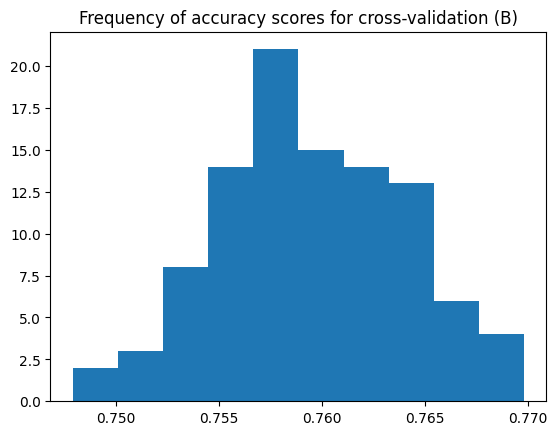

<Figure size 640x480 with 0 Axes>

In [41]:
plt.hist(accuracy_scores)
plt.title('Frequency of accuracy scores for cross-validation (B)')
plt.show()
plt.savefig('Frequency of accuracy scores for cross-validationB.png')

#Data Visualization

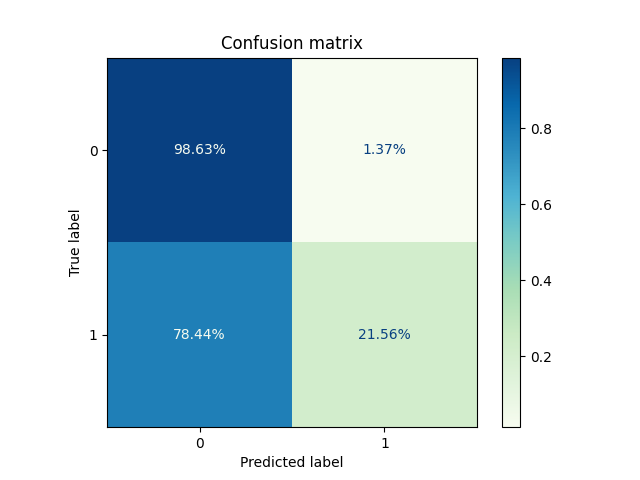

In [42]:
Image('confusion_matrix1.png')

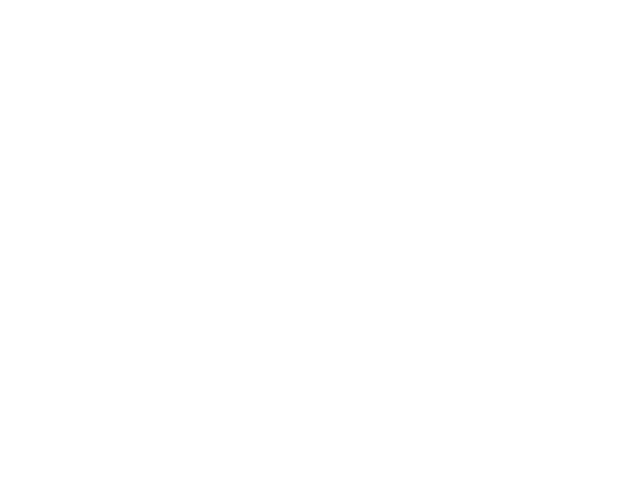

In [43]:
Image('Frequency of accuracy scores for cross-validation1.png')

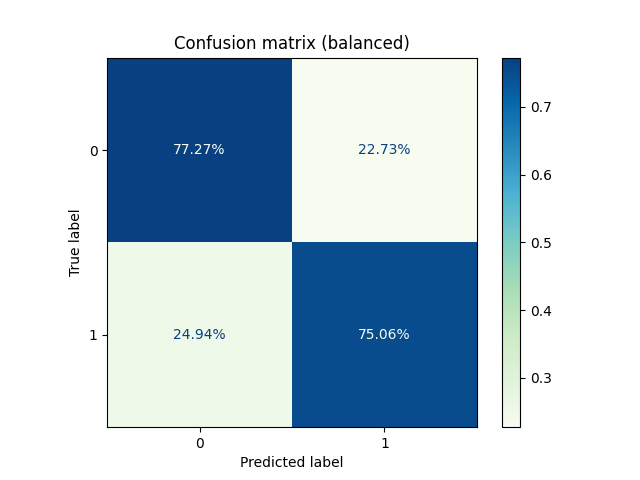

In [44]:
Image('confusion_matrix2.png')

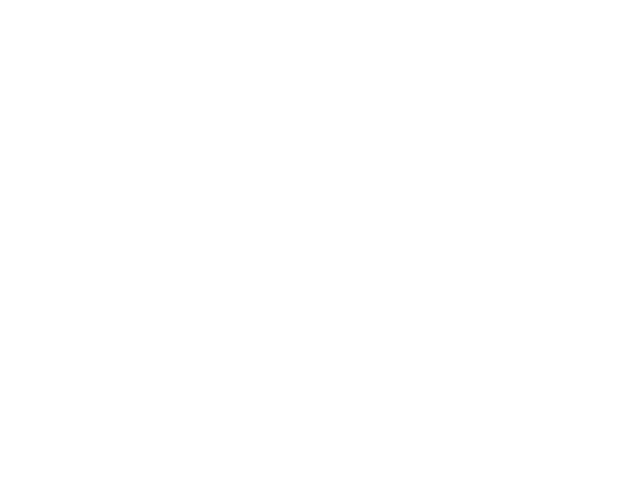

In [45]:
Image('Frequency of accuracy scores for cross-validationB.png')

#Communicate the results

We want to predict whether a future customer will make a transaction based on their transaction data. Based on binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

*We are able to predict whether there will be a successful transaction with 76% accuracy.*

It seems that with the smaller sample, even though it is balanced, the accuracy has gone down.  The bigger sample size, although skewed, has a higher accuracy percentage.

In the original analysis, the amount of 0s (unsuccessful transactions) overwhelms the 1s (successful transactions).  Which means we have really good accuracy with predicting the unsuccessful transactions.  But, we have rather poor predicting ability with predicting the successful transactions.  

No correlation was seen with the variables or features.  